In [9]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# Check curve lidar

In [36]:
cd = pd.read_csv("../data/s_curve_variable_velocity__lidar__data.csv")
pc = pd.read_csv('../data/s_curve_variable_velocity__pc.csv')

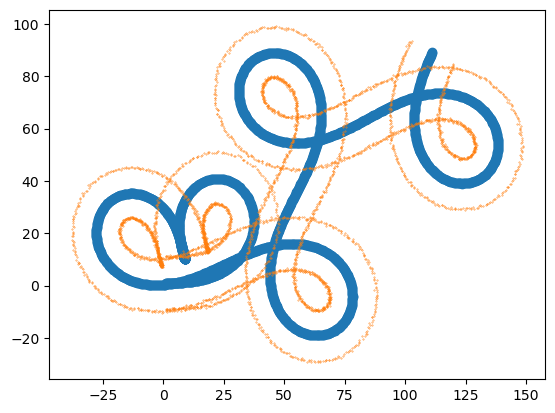

In [37]:
plt.scatter(cd['positions_x_ground_truth'], cd['positions_y_ground_truth'])
plt.scatter(pc['pc_x'], pc['pc_y'], s=0.1)

## LIDAR data generation

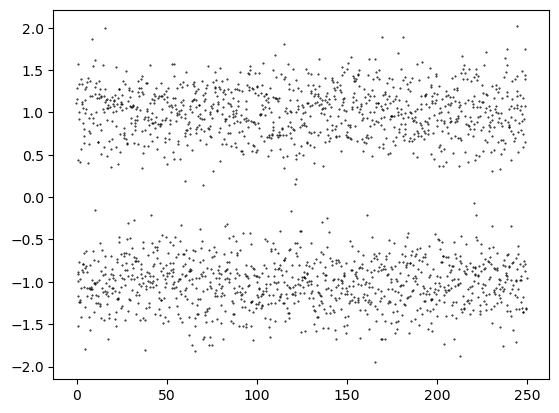

In [28]:
plt.scatter(pc['pc_x'], pc['pc_y'], s=0.2, c="black")

## Map Point Cloud Data

In [8]:
pc = pd.read_csv("../data/map/map_pc.csv")
pc['point_y'] = -pc['point_y']
pc.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/map/map_pc.csv'

In [68]:
pc.shape

(799539, 11)

In [69]:
def get_rotation_matrix(theta): 
    return np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

def linear_coord_transformation(local_pos: np.ndarray, rot_matrix: np.ndarray, global_pos):
    global_pos = np.dot(local_pos, rot_matrix) + global_pos
    return global_pos

In [70]:
pc_trans = []
for i,p in pc.iterrows():
     rot_mat = get_rotation_matrix(p['rot_yaw'])
     pc_trans.append(linear_coord_transformation(np.array([p['point_x'], p['point_y']]), rot_mat, np.array([p['loc_x'], p['loc_y']])))
pc_trans = np.array(pc_trans)

In [71]:
%matplotlib qt
plt.scatter(pc_trans[:,0], pc_trans[:,1], s=0.001)

In [7]:
angle = np.deg2rad(45)
add = np.deg2rad(90)
vector1 = np.array([np.cos(angle), np.sin(angle)])
vector2 = np.array([np.cos(angle+add), np.sin(angle+add)])
print(np.dot(vector1, vector2))

1.1102230246251565e-16


In [ ]:
plt.quiver()

## Evaluation Results

In [8]:
result_data = pd.read_csv("../data/evaluation_results/results.csv")

<BarContainer object of 4 artists>

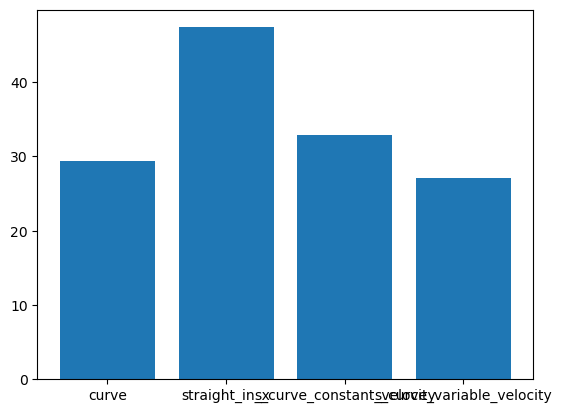

In [9]:
plt.bar(result_data['road'], result_data['mse_db'])

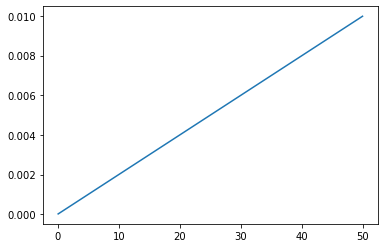

In [11]:
plt.plot(curve_data['timestamps'], curve_data['acceleration_input'])